<a href="https://colab.research.google.com/github/jx-dohwan/Deep_Learning_from_Scratch_study/blob/main/CH3_%EC%8B%A0%EA%B2%BD%EB%A7%9D(neural_network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CH3_신경망(neural network)
> #### 신경망은 쉽게 말하면 다층 퍼셉트론으로 입력층, 은닉층, 출력층으로 구성되어 있다. 
- 그리고 퍼셉트론에서 신경망으로 가기위해서는 활성화 함수가 존재한다. 활성화 함수는 입력 신호의 총합을 출력 신호로 변환하는 함수이다. 즉 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 하는 것이다. 
- 가중치를 곱한 입력 신호와 편향의 총합을 a라고 하는데 그것을 활성화 함수에 넣어 y라는 출력값을 뽑아내는 것이다.
- 정리
  - 단순 퍼셉트론 : 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델을 가리킴
  - 다층 퍼셉트론 : 신경망(여러 층으로 구성되고 시그모이드 함수 등과 매끈한 활성화 함수를사용하는 네트워크)을 가르킨다.

## 1. 활성화 함수
> #### 활성화 함수는 임계값을 경계로 출력이 바뀌는데 이런 함수를 계단 함수라고 한다. 활성화 함수를 계단함수에서 다른 함수로 변경하는 것이 신경망의 세계로 나아가는 열쇠이다. 여기에서는 신경마에서 이용하는 활성화 함수를 소개하겠다.

### 1) 시그모이드 함수
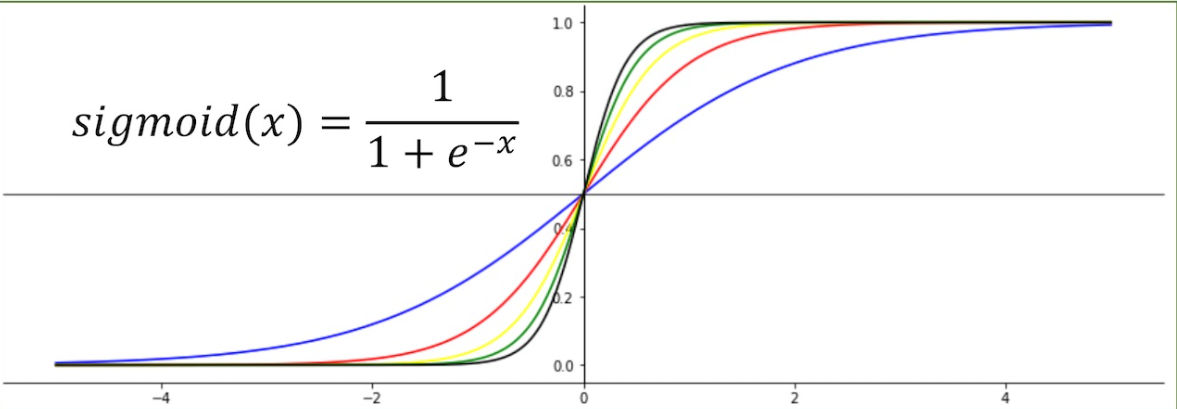
<br> 출처 : http://taewan.kim/post/sigmoid_diff/

#### (1) 계단 함수 구현

In [71]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

- 이 코드는 실수만 맏아들인다. 넘파이 배열을 인수로 넣을 수 없다. 그래서 밑에 다시 넘파이 배열도 지원되도록 수정해서 다시 함수를 만들도록 하겠다.

In [72]:
import numpy as np

def step_function(x):
  y = x > 0
  return y.astype(np.int)

In [73]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [74]:
y = x>0
y

array([False,  True,  True])

- bool을 int로 바꾼다는 것을 확인한 것이다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


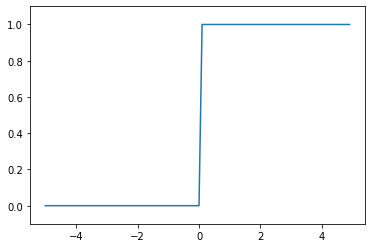

In [75]:
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

#### (2) 시그모이드 함수 구현

In [76]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

- np.exp(-x)는 exp(-x) 수식에 해당된다.

In [77]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

- 브로드캐스트 기능을 통해서 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각의 스칼라값의 연산으로 바꿔 수행한다.

In [78]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [79]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

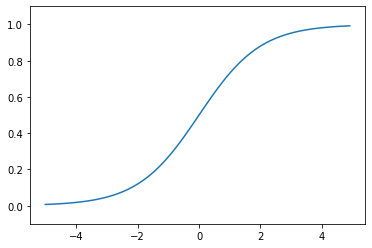

In [80]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

> #### 퍼셉트론에서는 뉴런 사이에 0혹은 1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다.
#### 계단 함수와 시그모이드 함수의 공통점은 둘다 비선형 함수라는 것이다.
#### 층을 쌓고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야한다.

### 2) ReLU함수
- 오래전부터 시그모이드 함수를 사용해왔지만 최근에는 ReLU함수를 주로 이용한다. ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고 0이하면 0을 출력하는 함수이다.

In [81]:
def relu(x):
  return np.maximum(0, x)

## 2. 다차원 배열의 계산
- 신경망을 효율적으로 구현하려면 넘파이의 다차원 배열 계산을 숙달해야한다.

### 1) 다차원 배열

In [82]:
A = np.array([1, 2, 3, 4])
print(A)

# 배열의 차원의 수를 확인
print(np.ndim(A))

# 배열 형상확인
print(A.shape)

print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [83]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 2) 행렬의 곱
- 행렬의 곱은 왼쪽 행렬의 행과 오른쪽 행렬의 열을 권소별로 곱하고 그 값들을 더해서 계산한다.
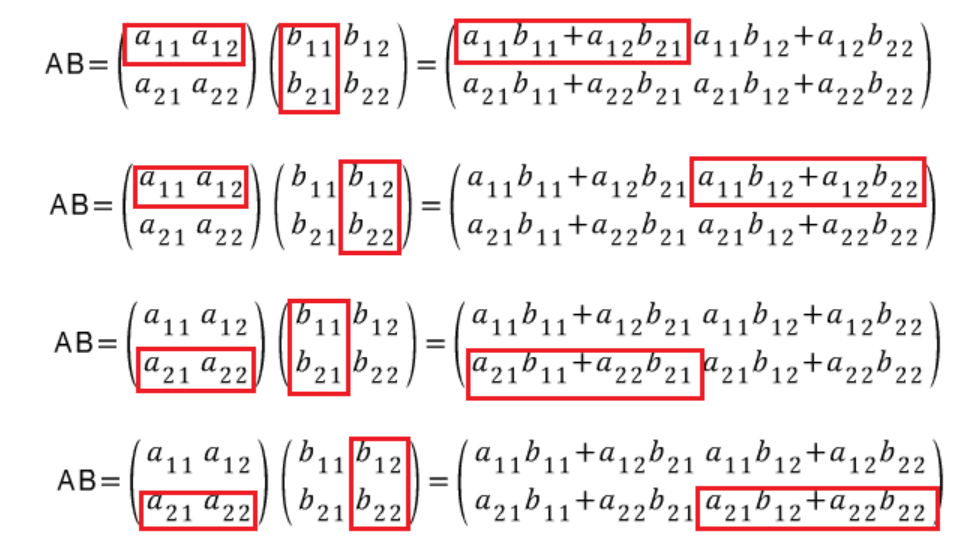
<br> 출처 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=dhkdwnddml&logNo=220277510428

In [84]:
A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B.shape)
# 행렬곱
print(np.dot(A,B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [85]:
A  = np.array([[1,2,3], [4,5,6]])
print(A.shape)

B = np.array([[1,2], [3,4], [5,6]])
print(B.shape)

print(np.dot(A,B))


(2, 3)
(3, 2)
[[22 28]
 [49 64]]


In [87]:
C = np.array([[1,2], [3,4]])
print(C.shape)

# print(np.dot(A,C))

(2, 2)


ValueError: ignored

In [88]:
print(np.dot(B,C))

[[ 7 10]
 [15 22]
 [23 34]]


### 3) 신경망에서의 행렬곱

In [89]:
X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5], [2,4,6]])
print(W)
print(W.shape)

Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3. 3층 신경망 구현하기
- 입력부터 출력까지의 처리를 구현하겠다. (순방향 처리)
- 3층 신경망은 입력층, 은닉층 2개, 출력층으로 구성되어 있다.
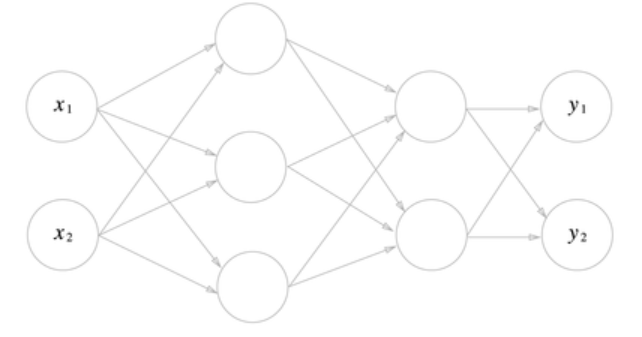
<br> 출처 : https://m.blog.naver.com/ssdyka/221295807014

In [90]:
X  = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


- 신호에 가중치를 곱한 값의 합과 편향까지 합을 더해서 시그모이드 함수에 담는다.
- 입력층에서 은닉1층으로 전달

In [91]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


- 은닉1층에서 은닉2층으로 전달

In [92]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


- 은닉2층에서 출력층으로 전달

In [93]:
def identity_function(x):
  return X

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

In [94]:
Y

array([1. , 0.5])

- 구현 정리

In [95]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2,0.4,0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])
  
  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[1.  0.5]


## 4. 출력층 설계하기
> 신경망은 분류화 회구 모두에 이용할 수 있다 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다. 일반적으로 회귀에는 항당 함수를, 분류에는 소프트맥스 함수를 사용한다.
- 항등함수 : 입력 그대로 출력하며 입력과 출력이 항상 같다는 뜻의 항등이다.
- 소프트맥스 함수 : 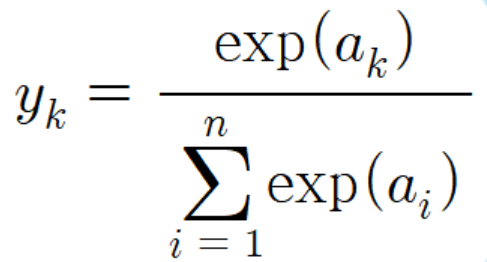
  - exp(x)는 지수함수이다.(e는 자연상수)
  - n은 출력층의 뉴런의 수
  - yk는 그중 k번째 출력임을 뜻한다.
  - 분자는 입력신호 ak의 지수함수
  - 분모는 모든 입력 신호의 지수함수의 합으로 구성된다.
<br> 출처 : https://www.crocus.co.kr/1519

In [97]:
 a = np.array([0.3, 2.9, 4.0])
 exp_a = np.exp(a)
 print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [98]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [99]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [101]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

주의사항
> 소프트맥스 함수는 지수 함수를 사용하는데, 지수 함수란것이 쉽게 아주 큰 값을 내뱉는다. 이런 큰 값끼리 나눗셈을 하면 결과 수치가 불안정해진다. 이 문제를 해결하기 위해서 소프트맥스 함수 구현을 개선해야 한다. 
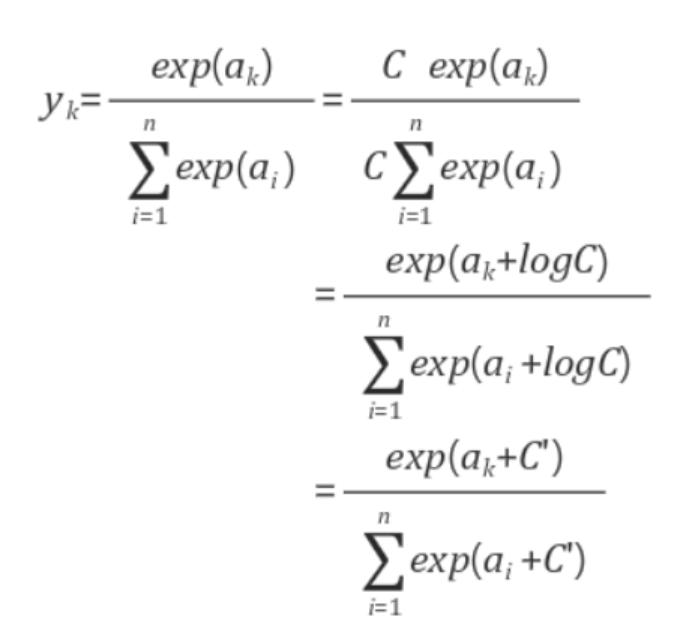
<br> 출처 : https://www.crocus.co.kr/1519

- 첫번째 변형에는 C라는 임의의 정수를 분자와 분모 양쪽에 곱했다.
- 그다음으로 C를 지수함수 exp()안으로 옮겨 logC를 만든다.
- 마지막으로 logC를 C' 라는 새로운 기호로 바꾼다.
> 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 바뀌지 않는다는 것을 말한다. 여기서 C'에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호중 최댓값을 이용하는 것이 일반적이다.

In [102]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [103]:
c = np.max(a)
a-c

array([  0, -10, -20])

In [104]:
np.exp(a-c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [105]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

- 소프트맥스 함수의 출력은 0에서 1.0사이의 실수이다. 또 소프트맥스의 총합은 1이다. 이것은 소프트 맥스의 중요한 성질이다.
- 이 성질 덕분에 소프트맥스 함수의 출력을 확률로 해석할 수 있다.
- 주의할 점
  - 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다.
  - 이는 지수 함수 y = exp(x)가 단조 증가 함수이기 때문이다.
  - 실제로 앞의 예에서 a의 원소들 사이의 대소 관계가 y의 원소들 사이의 대소 관계로 그대로 이어진다.
  - 신경망을 분류할때는 출력층의 소프트맥스 함수를 생략해도 된다. 그 이유는 신경만을 이융한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식하기 때문이다. 

In [107]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [108]:
np.sum(y)

1.0

- 출력층의 뉴런 수 정하기
  - 누런의 수는 풀려는 문제에 맞게 적절히 정해야한다. 0~9중 하나로 분류하는 문제라면 출력층의 뉴런을 10개로 설정한다.

## 5. 손글씨 숫자 인식

In [112]:
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False))

SyntaxError: ignored